In [126]:
import numpy as np
import math
import nbimporter
import matplotlib.pyplot as plt
from CoolProp.CoolProp import PropsSI

In [127]:
def F2K(F):
    return (F - 32) * 5/9 + 273.15

### Problem 1: Duct heat loss
A duct that is 2 ft by 5 ft in cross-section and 80 ft long carries conditioned air through the space above the hung ceiling in an office building. The air enters the duct from the air handler at 55 F and 2 in. water pressure with a flow rate of 8,000 cfm. The temperature in the space is 85 F. Determine\
a. The level of insulation needed on the sides of the duct to have a temperature rise of 1 F\
b. The drop in sensible cooling capacity due to the heat transfer to the air flow.\
c. The leakage flow rate from the duct.\
d. The total drop in capacity due to leakage and heat loss in energy and relative to the total capacity.\
Assume you are using insulation with a thermal
conductivity of kins = 0.025 Btu/hr-ft-F. Also assume a duct leakage class of 6.

Information we know:

In [128]:
T_i = 55 # Duct inlet temperature,[F]
T_o = 56 # Duct outlet temperature, [F]
T_a = 85 # ambient temperature, [F]
V_dot = 8000 # air flow rate, [cfm]
L = 80 # duct length, [ft]
P_i = 2 # total pressure ar inlet, [inH2O]
h_o = 0.62 # outside heat transfer coefficient, [F-ft2-hr/Btu]
k_ins = 0.025 # thermal conductivity, [Btu/hr-ft-F]
Area = 2 * (2 + 5) * L # area of the duct [ft2]

The mass flow rate: 
$$\dot{m}_{air} = \dot{V}_{air} \rho$$
The total capacity delivered to the space:
$$\dot{Q}_{total} = \dot{m}_{air}c_p(T_a - T_i)$$

In [129]:
P_atm = 14.7 #[psi]
rho_air = PropsSI('D', 'T', F2K(T_i), 'P', 101325, 'Air') * 0.062428 # convert from kg/m3 to lb/ft3
c_p = PropsSI('C', 'T', F2K(T_i), 'P', 101325, 'Air') * 0.0002390057 # [btu/lbm-F]
m_dot = V_dot * rho_air * 60 # [lbm/hr]
print('mass flow rate:',f"{m_dot:.2f}",'lbm/hr')
Capacity = m_dot * c_p * (T_a - T_i)
print('The total capacity is:',f"{m_dot:.2f}",'Btu/hr')


mass flow rate: 37010.11 lbm/hr
The total capacity is: 37010.11 Btu/hr


The outlet temperature can be found:
$$T_o = T_i - (T_i-T_a)[1-e^{-\frac{UA}{\dot{m}_{air}c_p}}]$$
And it also can be writed as:
$$T_o = T_i - (T_i-T_a)[1-e^{-\frac{1}{R_{total}\dot{m}_{air}c_p}}]$$
where $R_{total}$ is the total resistance, which can be obtained:
$$R_{total} = -\frac{1}{\ln{\frac{T_a-T_o}{T_a-T_i}} * \dot{m}_{air}c_p}$$
The total resistance is the sum of the insulation and external resistance:
$$R_{total} = R_{ins} + R_o$$
where:
$$R_o = \frac{1}{h_o*Area}$$
$$R_{ins} = \delta * \frac{1}{k_{ins}*Area}$$
where $\delta$ is the thinkness of insulation


In [130]:
R_total = -(1/(math.log((T_a-T_o)/(T_a-T_i))*m_dot*c_p))
R_o = 1/(h_o * Area)
R_ins = R_total - R_o
thickness = R_ins * k_ins * Area * 12
print('The thickness of insulation is',f"{thickness:.2f}",'in')

The thickness of insulation is 0.63 in


b. The drop in sensible cooling capacity due to the heat transfer to the air flow is:
$$\dot{Q}_{heatloss} = \dot{m}_{air}c_p(T_o - T_i)$$

In [131]:
Q_cap_drop = m_dot * c_p *(T_o - T_i)
print ('The drop in sensible cooling capacity is',f"{Q_cap_drop:.2f}",'Btu/hr')


The drop in sensible cooling capacity is 8898.19 Btu/hr


c. The leakage flow rate from the duct. Assume a duct leakage class of 6
$$C_L = 6   [cfm/100-ft^2-inH_2O^{0.65}]$$
Thus, the leakage air flow rate is:
$$\dot{V}_{leak} = C_L/100 * Area * P_i^{0.65}$$
The drop in cooling capacity due to leakage:
$$\dot{Q}_{leak} = \dot{m}_{air}c_p(T_a - T_i)$$


In [132]:
C_L = 6
V_dot_leak = C_L/100 * (Area) * P_i**0.65
Q_leak = V_dot_leak * 60 * rho_air * c_p *(T_a - T_i)
print ('The leakage flow rate is',f"{V_dot_leak:.2f}", 'cfm')
print ('The drop in cooling capacity due to leakage',f"{Q_leak:.2f}", 'Btu/hr')

The leakage flow rate is 105.45 cfm
The drop in cooling capacity due to leakage 3518.61 Btu/hr


In [133]:
precent_cap = (Q_cap_drop + Q_leak)/Capacity * 100
print('The total drop in capacity due to leakage and heat loss in energy and relative to the total capacity',
      f"{precent_cap:.2f}",'%')

The total drop in capacity due to leakage and heat loss in energy and relative to the total capacity 4.65 %


### HW6 Problem 4
The pressure and flow rate characteristics of a fan operating at 1,800 Hz are given in Figure.\
a.	Determine and plot the fan curve for rotational speeds of 900Hz and 2,400 Hz. \
b.	Determine and plot the power for the three speeds as a function of flow rate. 


In [140]:
def FunCurve(V):
    return 0.446332556 + 0.000377075887* V - 2.81006216e-7 * V**2 + 5.41051541e-11* V**3 - 3.58974359e-15 * V**4

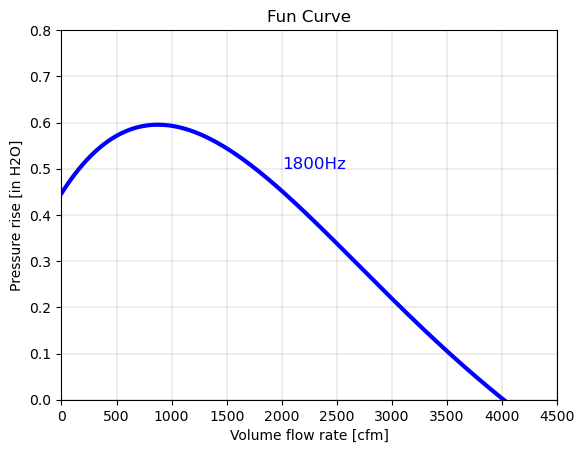

In [153]:
V = np.arange(4500)
P = np.zeros(len(V))
for i in range(len(V)):
   P[i] = FunCurve(V[i])

plt.plot(V, P,'b',linewidth=3)
plt.grid(True, color='gray', linestyle='-', linewidth=0.2)
plt.xlabel('Volume flow rate [cfm]')
plt.ylabel('Pressure rise [in H2O]')
plt.title('Fun Curve')
plt.text(2000, 0.5, "1800Hz", fontsize=12, color='blue')
plt.xlim(0, 4500)
plt.ylim(0, 0.8)
plt.show()
plt.show()

Fan ideal power:
$$\dot{W}_{ideal} = \dot{V} \Delta{P}$$

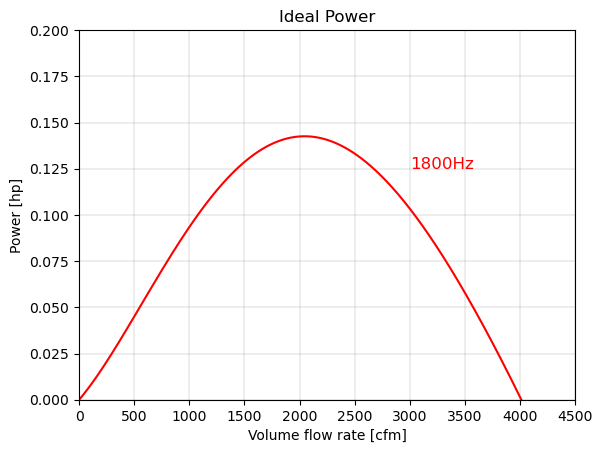

In [ ]:
W = np.zeros(len(V))
for i in range(len(V)):
   W[i] = V[i]*P[i]*1.57646e-4

plt.plot(V, W,'r',linewidth=3)
plt.grid(True, color='gray', linestyle='-', linewidth=0.2)
plt.xlabel('Volume flow rate [cfm]')
plt.ylabel('Power [hp]')
plt.title('Ideal Power')
plt.text(3000, 0.125, "1800Hz", fontsize=12, color='red')
plt.xlim(0, 4500)
plt.ylim(0, 0.2)
plt.show()
plt.show()

Apply affinity law for air flow rate:
$$\dot{V}_2 = \dot{V}_1\bigg(\frac{N_2}{N_1}\bigg)$$
Pressure rise:
$$\Delta{P}_2 = \Delta{P}_1\bigg(\frac{N_2}{N_1}\bigg)^2$$
Ideal power:
$$\dot{W}_2 = \dot{W}_1\bigg(\frac{N_2}{N_1}\bigg)^3$$

In [145]:
N = 1800
N_1 = 900
N_2 = 2400
V_1 = np.zeros(len(V))
V_2 = np.zeros(len(V))
P_1 = np.zeros(len(V))
P_2 = np.zeros(len(V))
W_1 = np.zeros(len(V))
W_2 = np.zeros(len(V))
for i in range(len(V)):
   V_1[i] = V[i]*(N_1/N)
   V_2 [i] = V[i]*(N_2/N)
   P_1[i] = P[i]*(N_1/N)**2
   P_2 [i] = P[i]*(N_2/N)**2
   W_1[i] = W[i]*(N_1/N)**3
   W_2 [i] = W[i]*(N_2/N)**3


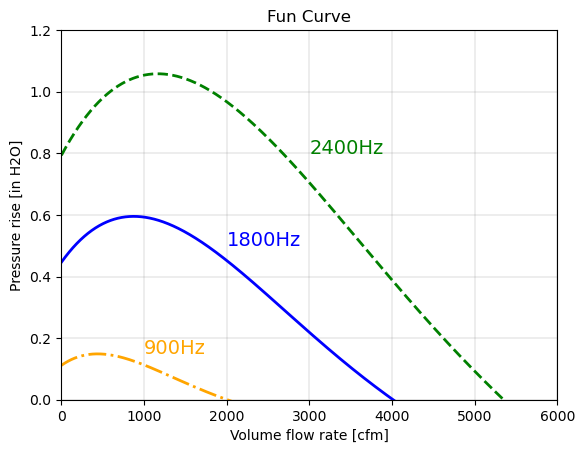

In [171]:
plt.plot(V, P,'-',color='blue',linewidth=2)
plt.plot(V_1, P_1,'-.',color='orange',linewidth=2)
plt.plot(V_2, P_2,'--',color='green',linewidth=2)
plt.grid(True, color='gray', linestyle='-', linewidth=0.2)
plt.xlabel('Volume flow rate [cfm]')
plt.ylabel('Pressure rise [in H2O]')
plt.title('Fun Curve')
plt.text(2000, 0.5, "1800Hz", fontsize=14, color='blue')
plt.text(1000, 0.15, "900Hz", fontsize=14, color='orange')
plt.text(3000, 0.8, "2400Hz", fontsize=14, color='green')
plt.xlim(0, 6000)
plt.ylim(0, 1.2)
plt.show()


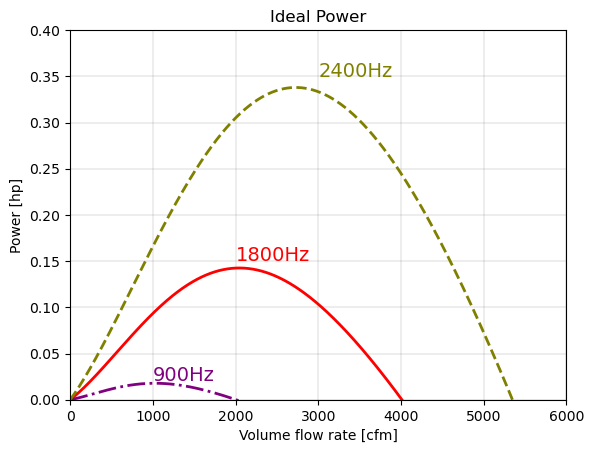

In [176]:
plt.plot(V, W,'-',color='red',linewidth=2)
plt.plot(V_1, W_1,'-.',color='purple',linewidth=2)
plt.plot(V_2, W_2,'--',color='olive',linewidth=2)
plt.grid(True, color='gray', linestyle='-', linewidth=0.2)
plt.xlabel('Volume flow rate [cfm]')
plt.ylabel('Power [hp]')
plt.title('Ideal Power')
plt.text(2000, 0.15, "1800Hz", fontsize=14, color='red')
plt.text(1000, 0.02, "900Hz", fontsize=14, color='purple')
plt.text(3000, 0.35, "2400Hz", fontsize=14, color='olive')
plt.xlim(0, 6000)
plt.ylim(0, 0.4)
plt.show()
plt.show()